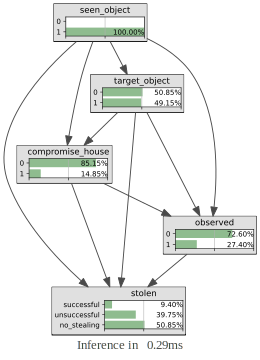

In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN("Test.net")
bn
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={})

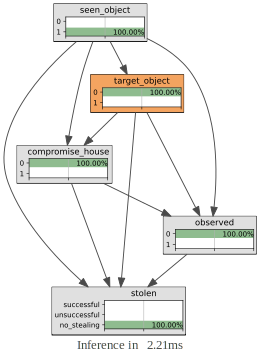

In [3]:
ie=gum.LazyPropagation(bn)
gnb.showInference(bn,evs={'target_object':0})

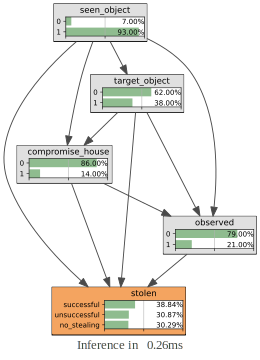

In [3]:
gnb.showInference(bn,evs={'stolen':[0.33333, 0.33333, 0.33333]})

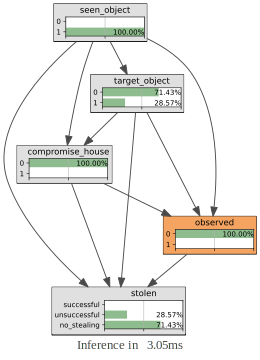

In [2]:
gnb.showInference(bn,evs={'target_object':0})


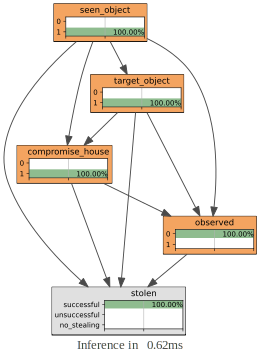

In [2]:
gnb.showInference(bn,evs={'observed':0, 'compromise_house': 1,
                          'target_object': 1, "seen_object": 1})
